In [17]:
# Task 1: Try the algo on Same Whether dataset- LabelEncoding of features: and Train test Division 90%-10%¶

# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call

In [18]:
# reading data into main_data
from sklearn import datasets, preprocessing

main_data = pd.read_csv("/Dataset2.csv")

# labelEncoder Object
label_encoder = preprocessing.LabelEncoder()

for data in main_data:
  print(f"\n\nHeading : {data}")
  print(list(main_data[data]))
  main_data[data] = label_encoder.fit_transform(main_data[data])

  print(f"\n\nAfter the tranformation of {data}")
  print(list(main_data[data]))



Heading : Outlook
['R', 'R', 'O', 'S', 'S', 'S', 'O', 'R', 'R', 'S', 'R', 'O', 'O', 'S']


After the tranformation of Outlook
[1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2]


Heading : Temp
['H', 'H', 'H', 'M', 'M', 'M', 'C', 'C', 'C', 'M', 'M', 'M', 'H', 'M']


After the tranformation of Temp
[1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2]


Heading : Wind
['F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T']


After the tranformation of Wind
[0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]


Heading : Humidity
['Normal', 'High', 'Normal', 'Normal', 'Normal', 'Low', 'Normal', 'Normal', 'Low', 'High', 'High', 'Low', 'Normal', 'Normal']


After the tranformation of Humidity
[2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2]


Heading : Class
['N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N']


After the tranformation of Class
[0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [19]:
# zipping all the features of atmosphere

combined_features = tuple(zip(main_data["Outlook"], main_data["Temp"], main_data["Wind"], main_data["Humidity"]))
print("After combined!")

print("\n(Outlook, Temp, Wind, Humidity)\n")
for pair in combined_features:
    print(pair)

After combined!

(Outlook, Temp, Wind, Humidity)

(1, 1, 0, 2)
(1, 1, 1, 0)
(0, 1, 0, 2)
(2, 2, 0, 2)
(2, 2, 0, 2)
(2, 2, 1, 1)
(0, 0, 1, 2)
(1, 0, 0, 2)
(1, 0, 0, 1)
(2, 2, 0, 0)
(1, 2, 1, 0)
(0, 2, 1, 1)
(0, 1, 0, 2)
(2, 2, 1, 2)


In [20]:
# Train test spiltting
# Train test Division 90%-10%, Roll No. : 57
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(combined_features, main_data["Class"], test_size = 0.1, random_state = 57)

# Create a decisionTreeCalssifier object

from sklearn import metrics
dtc = DecisionTreeClassifier(criterion = "entropy",max_leaf_nodes=57)
dtc.fit(x_train, y_train)

y_predicted = dtc.predict(x_test)

# Accuracy

accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy : ",accuracy)

Accuracy :  1.0


Confusion matrix:
[[2]]


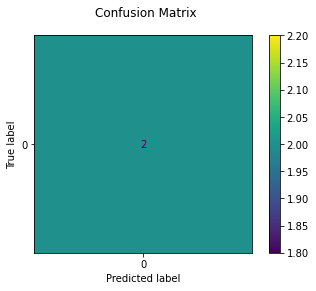

In [21]:
# Displaying confusion matrix

disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

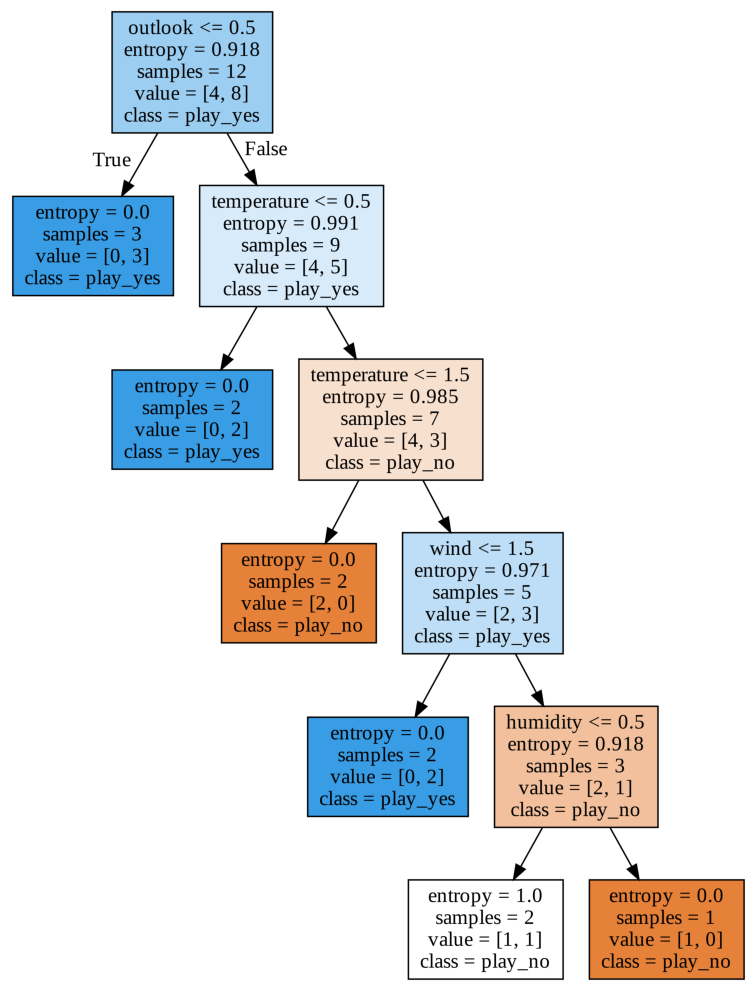

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file='tree_entropy.dot',
               feature_names=['outlook','temperature','humidity','wind'],
               class_names=['play_no','play_yes'], 
               filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();

In [27]:
# Prediction for Outlook is ’Rainy’, Temperature is ’Mild’, Humidity =’Normal’, and Wind = ’False’
print(dtc.predict([[1,2,0,2]]))

# Prediction for Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity =’High’, and Wind = ’True’
print(dtc.predict([[2,0,1,0]]))


[0]
[1]
